Airbnb Calendar Data EDA

# Introduction

In the following notebook, I will be performing an EDA of Airbnb's calendar data of the San Francisco area. This data pertains to the last calendar year, which at the time of this analysis would be January 2018 through December 2019.

*GitHub Repo References*

* The raw data files can be found [here](https://github.com/KishenSharma6/Airbnb-SF_ML_-_Text_Analysis/tree/master/Data/01_Raw).
* The raw data aggregation scripts can be found [here](https://github.com/KishenSharma6/Airbnb-SF_ML_-_Text_Analysis/tree/master/Project%20Codes/01.%20Raw%20Data%20Aggregation%20Scripts).
* The data cleaning scripts can be found [here](https://github.com/KishenSharma6/Airbnb-SF_ML_-_Text_Analysis/tree/master/Project%20Codes/02.%20Data%20Cleaning%20Scripts).

## Read in libraries and set notebook preferences

In [2]:
#Read in libraries
import dask.dataframe as dd
import swifter
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set pandas options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:.0f}'.format

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Set plot aesthetics for notebook
plt.style.use('ggplot')

## Read in data

In [4]:
#Set path to file
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#Read in Airbnb Calendar data
calendar = pd.read_csv(path + '01_04_2020_Calendar_Cleaned.csv', sep = ',',
                       parse_dates=['date'], low_memory=True,index_col=0)

## Preview Data

**Airbnb Calendar Data**

In [5]:
#Preview calendar data
display(calendar.head())

,adjusted_price,available,date,listing_id,maximum_nights,minimum_nights,price
0,80,0,2019-04-03,187730,120,3,80
1,80,0,2019-04-04,187730,120,3,80
2,82,1,2019-04-05,187730,120,3,82
3,82,1,2019-04-06,187730,120,3,82
4,81,1,2019-04-07,187730,120,3,81


In [6]:
#View data types
calendar.dtypes

adjusted_price           float64
available                  int64
date              datetime64[ns]
listing_id                 int64
maximum_nights           float64
minimum_nights           float64
price                    float64
dtype: object

# Exploratory data analysis

## Distributions

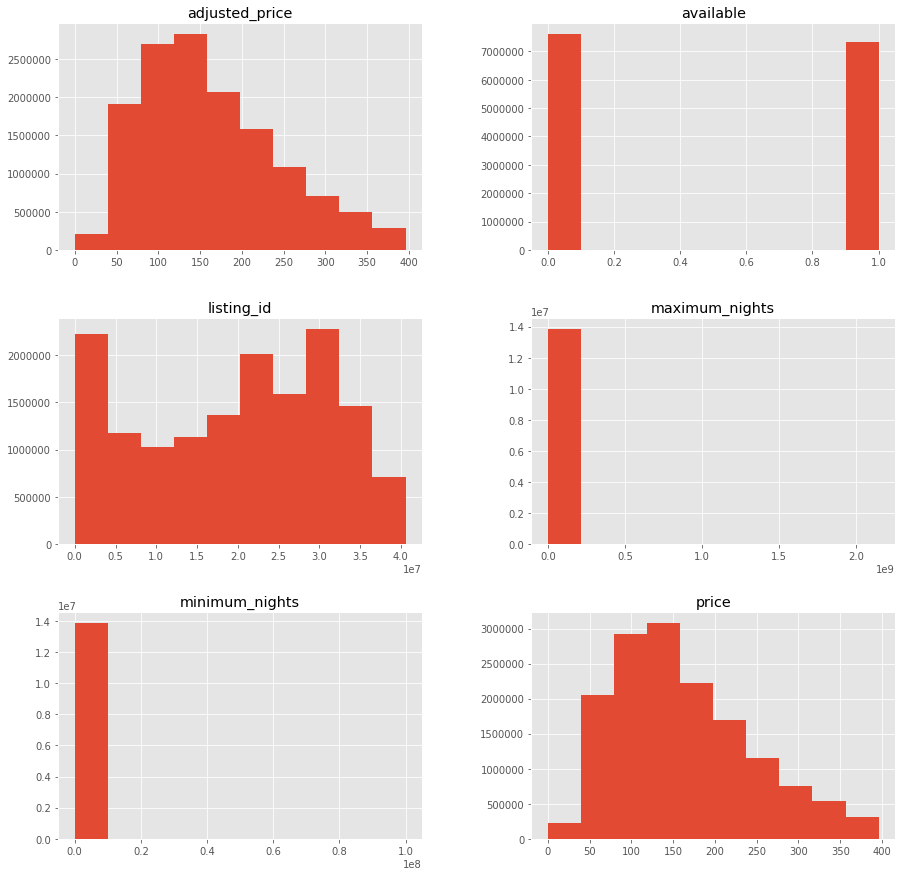

In [9]:
calendar.hist(figsize = (15,15));

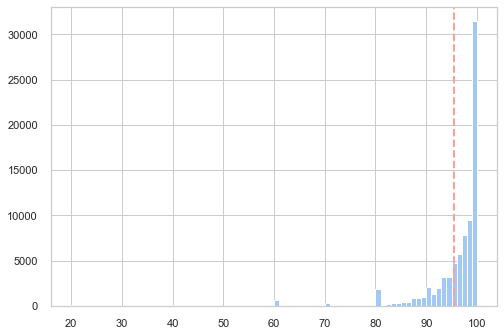

In [10]:
#plot hist
listings.review_scores_rating.hist(bins = 80)

#plot the mean
mean = np.mean(listings.review_scores_rating)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

Listings price

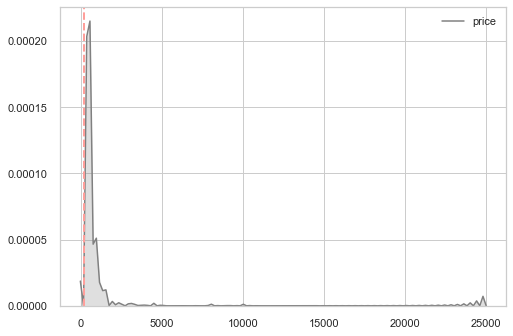

In [11]:
#KDE
ax = sns.kdeplot(listings.price, shade=True, color="grey")

#plot the mean
mean = np.mean(listings.price)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

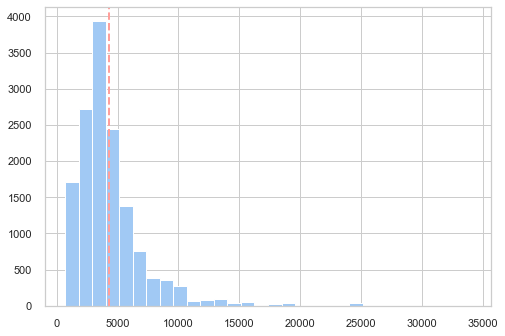

In [12]:
listings.monthly_price.hist(bins = 30)

#plot the mean
mean = np.mean(listings.monthly_price)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

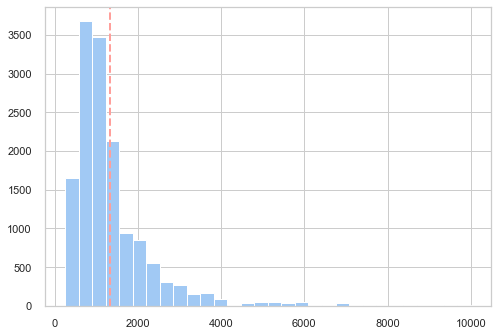

In [13]:
listings.weekly_price.hist(bins = 30)

#plot the mean
mean = np.mean(listings.weekly_price)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

#### Listings Outlier Removal for Price variable

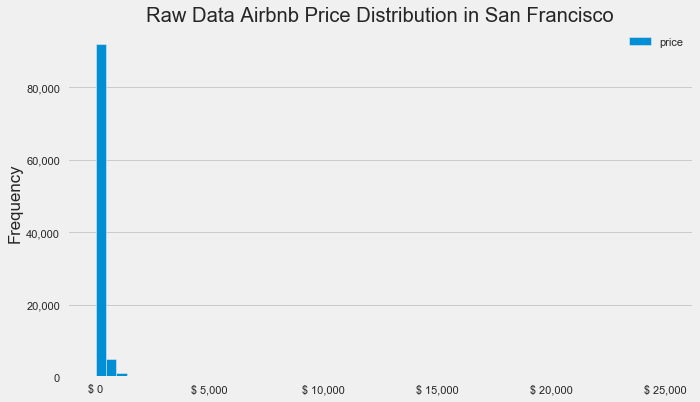

In [14]:
#Set 538 plot style
plt.style.use('fivethirtyeight')

#Airbnb price distributions
listings.price.plot(kind = 'hist', bins=55,  title='Raw Data Airbnb Price Distribution in San Francisco',
          legend = True, figsize=(10,6));

#Get axis object
ax = plt.gca()

#Format axes
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$ {:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Mute grid lines
ax.grid(b=False, which ='major', axis = 'x')

#Set Path to write plot
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Output Files\Visualizations\Listings Data Distributions'

#Save plot to png
#plt.savefig(path + '\Listings Raw Data Price Distribution.png',bbox_inches = 'tight')

In [15]:
#Calculate IQR of price
q25 = listings['price'].quantile(0.25)
q75= listings['price'].quantile(0.75)
iqr = q75 - q25

#Print percentiles
print('Percentiles: 25th={:.3f}, 75th={:.3f} \nIQR= {:.3f}'.format(q25, q75, iqr))

#Calculate outlier cutoffs
cut_off =1.5 * iqr
lower, upper = q25 - cut_off, q75 + iqr

#Identify outliers
outliers = [x for x in listings.price if x < lower or x > upper]
print("Number of outliers identified: {}".format(len(outliers)))

#Remove outliers
outliers_removed = [x for x in listings.price if x >= lower and x <= upper]
print('Non-outlier observations: {}'.format(len(outliers_removed)))

#Update df
listings = listings[listings.price.isin(outliers_removed)]
print('Current listings shape:',listings.shape)

Percentiles: 25th=100.000, 75th=240.000 
IQR= 140.000
Number of outliers identified: 10025
Non-outlier observations: 88771
Current listings shape: (88771, 68)


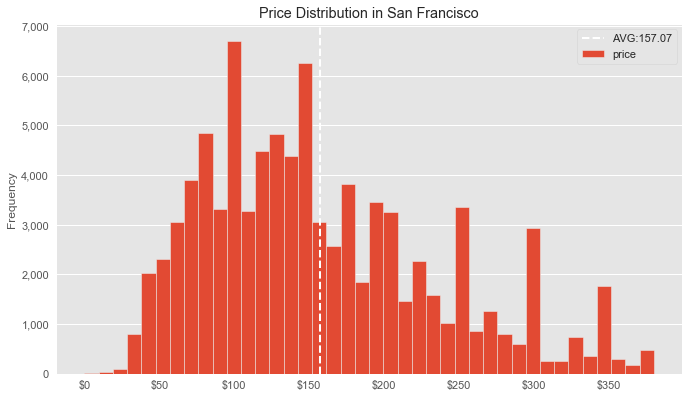

In [16]:
#Set ggplot plot style
plt.style.use('ggplot')

#Airbnb price distributions(outliers removed)
listings.price.plot(kind = 'hist', bins=40,  title='Price Distribution in San Francisco',
           figsize=(10,6));

#Capture mean and median of price
mean = listings.price.mean()
median = listings.price.median()

#Plot mean and median
plt.axvline(mean, color='white', linewidth=2, linestyle='--', label= 'AVG:'+ str(round(mean,2)))

#Get axis object
ax = plt.gca()

#Format axes
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Mute grid lines
plt.grid(b=False, which ='major', axis = 'x')

#Set legend
plt.legend(loc='upper right',frameon=True, fancybox=True)

#Save plot to png
#plt.savefig(path + '\Listings Data Price Distribution.png',bbox_inches = 'tight')

Over the last year, there has been significant growth in the number of listings available for rent month to month. Let us look into the number of nights booked by users over the last year.

Latitude and longitude

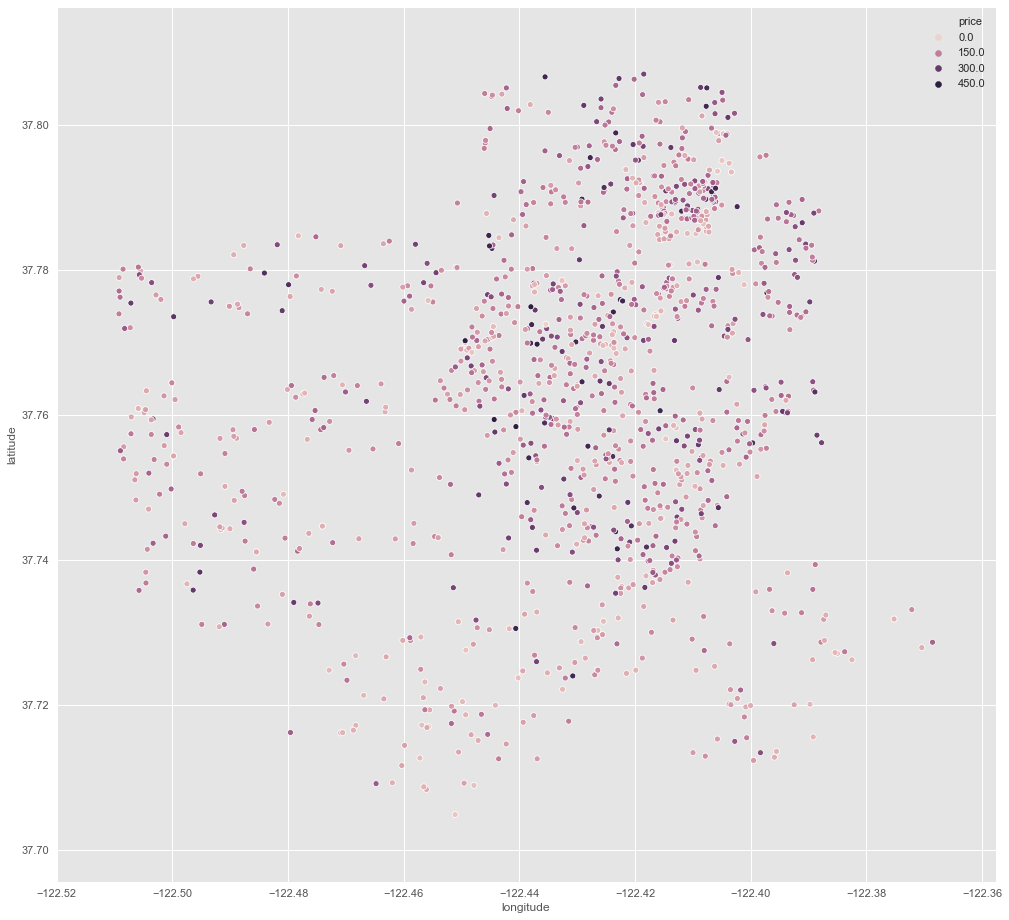

In [17]:
fig, ax = plt.subplots(figsize = (15,15))

sns.scatterplot(x='longitude', y = 'latitude',hue = 'price', data = listings.iloc[:-1:70,:], ax = ax)

**Growth by neighborhood December 2018 - December 2019**

We'll merge our calendar data with listings data to capture neighborhood data

In [18]:
#Pull month and year date from date column
calendar['year']= pd.DatetimeIndex(calendar['date']).year
calendar['month']= pd.DatetimeIndex(calendar['date']).month

#Set dates
calendar= calendar[(calendar.year == 2018) | (calendar.year == 2019)]

#Drop unnecessary columns for merge to preserve memory
temp = calendar.drop(columns=['price','maximum_nights','minimum_nights',
                             'available'])

In [19]:
#capture listing id and neighbourhood_cleansed from listings for merge
neighborhoods = listings[['id', 'neighbourhood_cleansed']]

#Merge with calendar
neighborhood_growth = temp.merge(neighborhoods, left_on ='listing_id', right_on='id')

#Drop redundant columns
neighborhood_growth= neighborhood_growth.drop(columns = ['id'])

#Drop Dupes
neighborhood_growth.drop_duplicates(inplace=True)

In [20]:
#Group last year by month_year and get a count of unique listings per month
neighborhood_growth = neighborhood_growth.groupby(['neighbourhood_cleansed', 'year', 'month'])['listing_id'].agg({'nunique'}).reset_index()

#Rename columns
neighborhood_growth =neighborhood_growth.rename(columns = {'neighbourhood_cleansed': 'neighborhoods',
                                                                 'nunique': 'listings'})

In [21]:
neighborhood_growth = neighborhood_growth.sort_values(by=['year','month', 'listings'], ascending=False)